<a href="https://colab.research.google.com/github/Nikhil768692/machine_learning/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SER/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/OAF_angry/OAF_get_angry.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/OAF_angry/OAF_gin_angry.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/OAF_angry/OAF_germ_angry.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/OAF_angry/OAF_good_angry.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/OAF_angry/OAF_gaze_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/SER/TESS Toronto emotio...,angry
1,/content/drive/MyDrive/SER/TESS Toronto emotio...,angry
2,/content/drive/MyDrive/SER/TESS Toronto emotio...,angry
3,/content/drive/MyDrive/SER/TESS Toronto emotio...,angry
4,/content/drive/MyDrive/SER/TESS Toronto emotio...,angry


In [ ]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

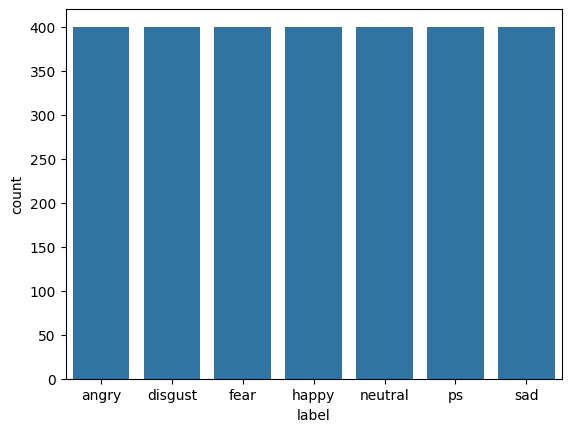

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

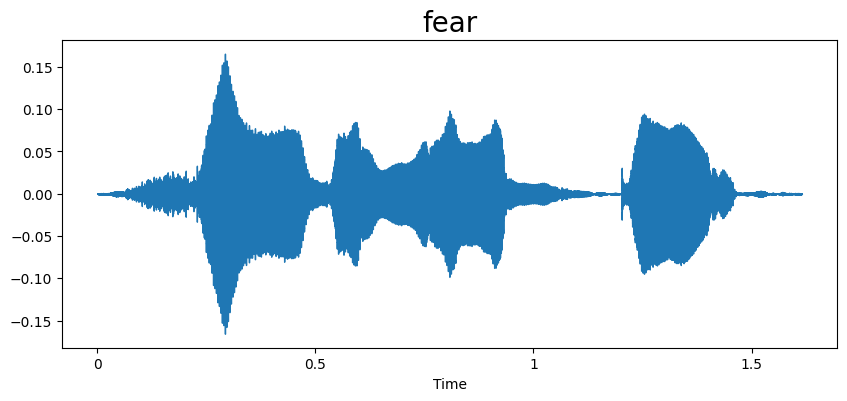

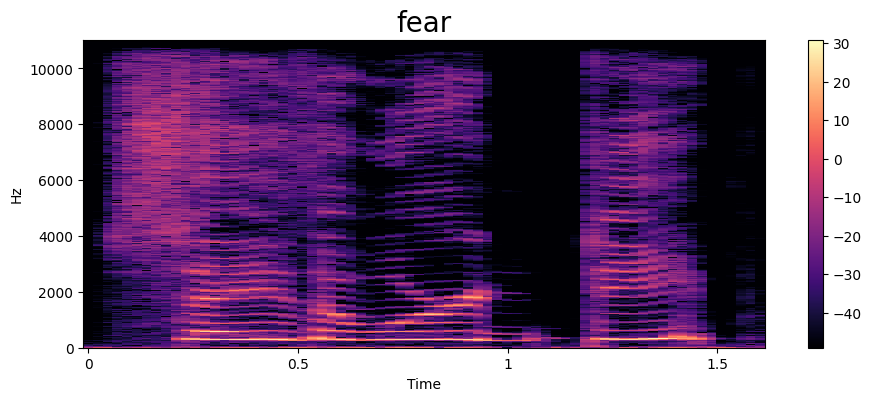

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

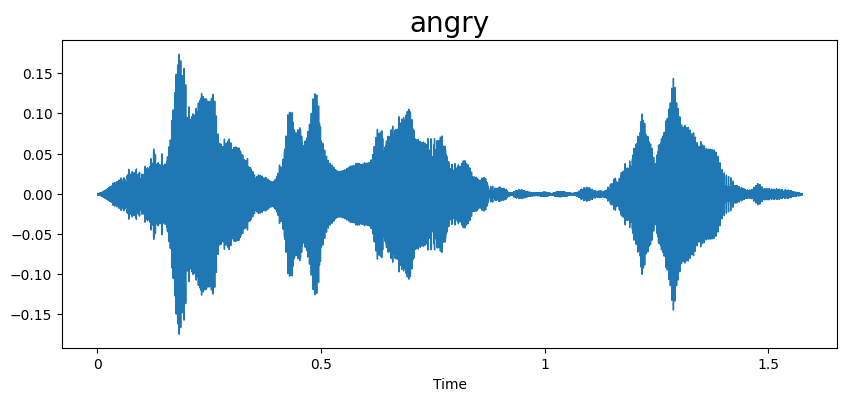

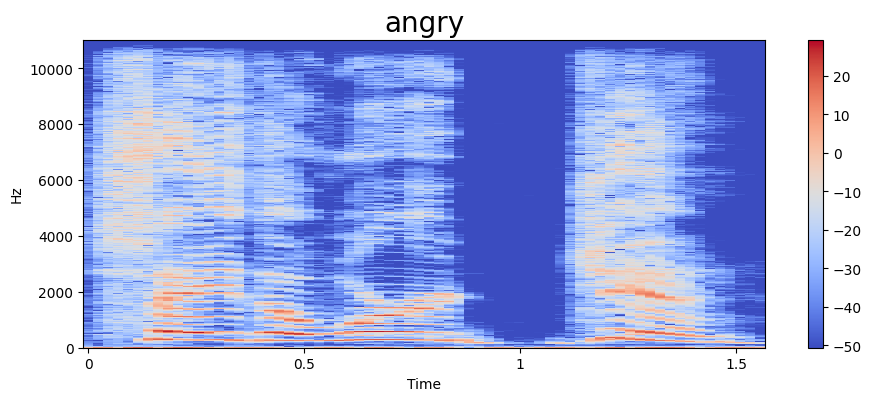

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

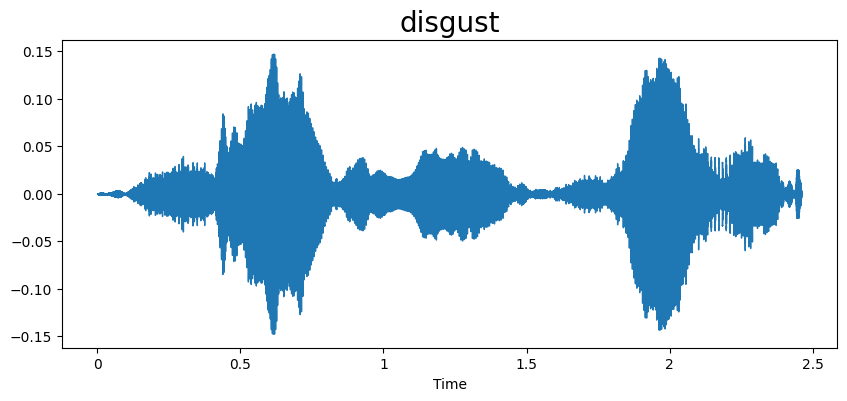

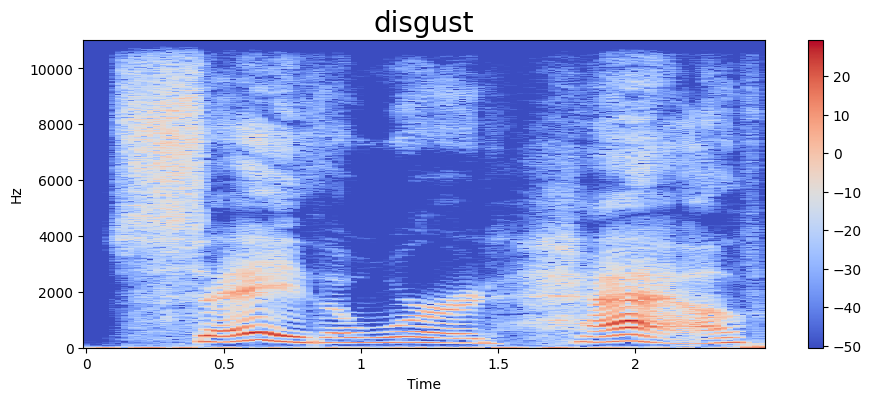

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


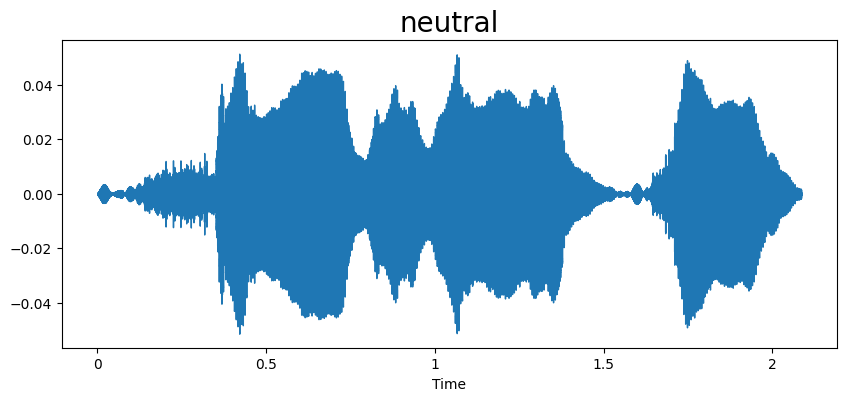

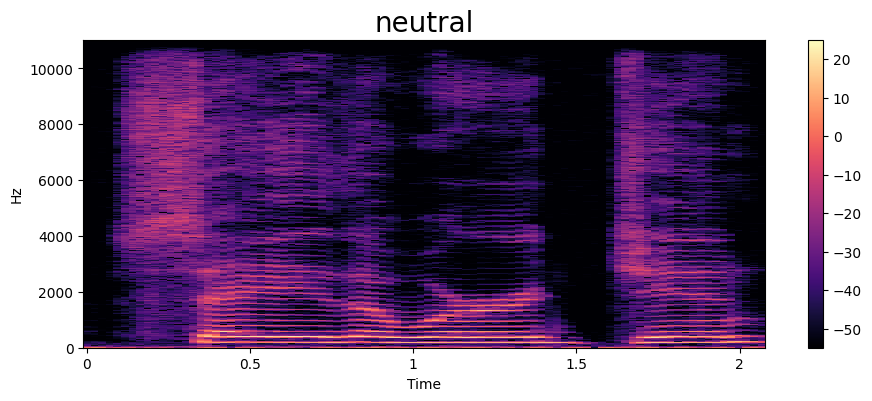

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

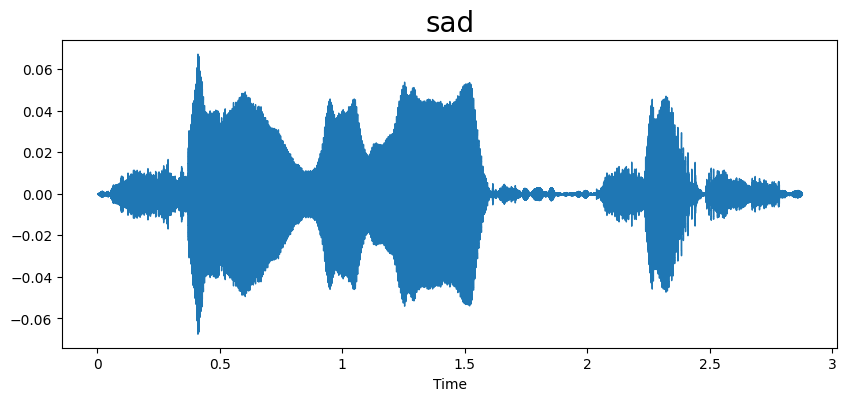

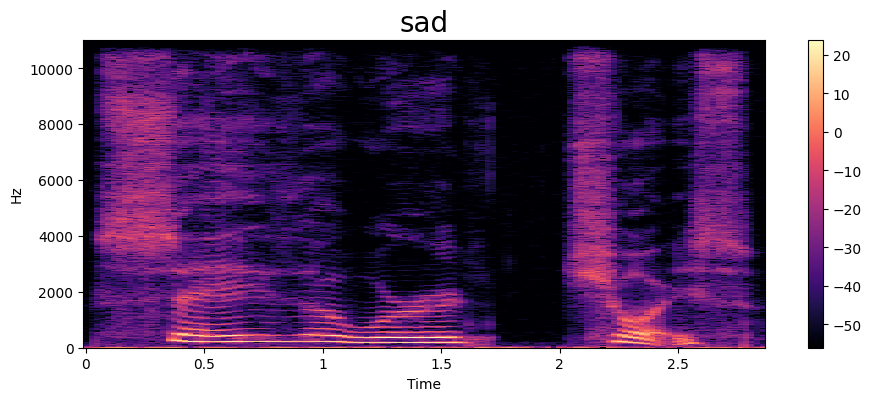

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

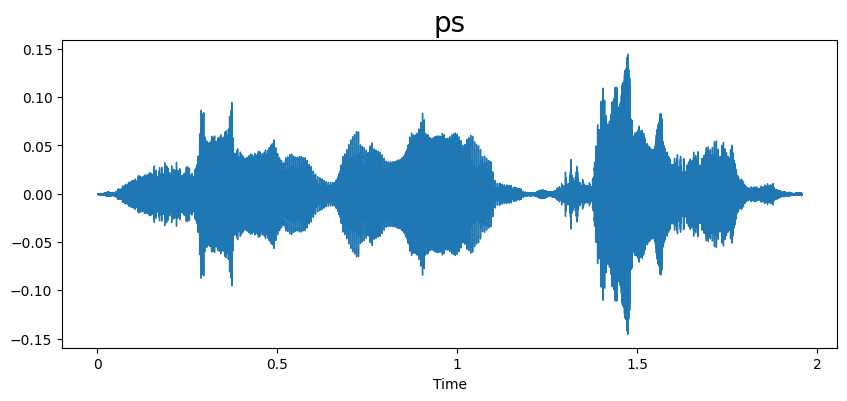

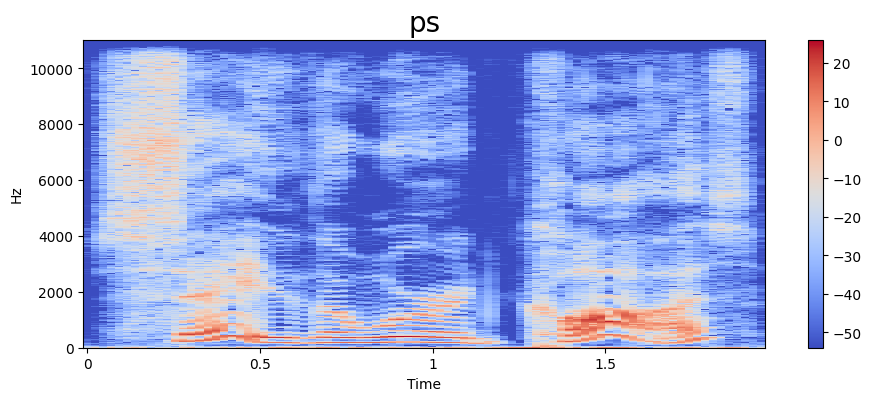

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


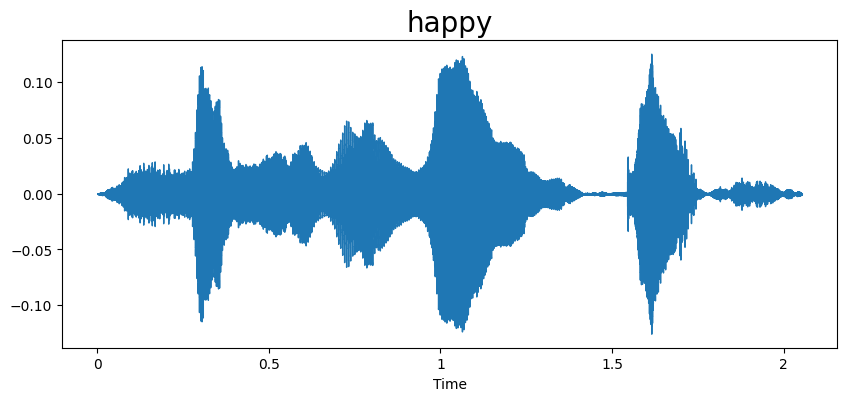

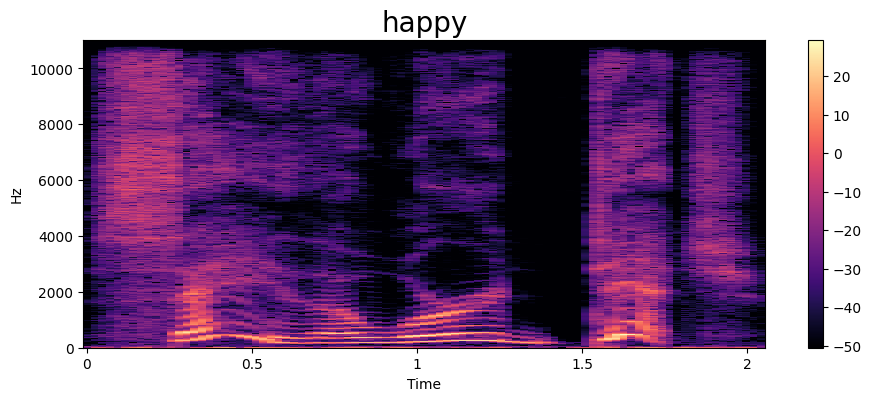

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.4735535e+02,  6.5211884e+01, -5.5304279e+00, -4.9365177e+00,
        6.0946971e-01,  7.6347322e+00, -2.1106916e+01, -9.0484524e+00,
       -5.3070250e+00,  2.8673880e+00,  1.7104191e+00, -2.3453333e+00,
        2.4477863e+00,  3.9976377e+00,  2.0275018e+00, -3.6383379e-01,
       -2.4425113e+00, -2.6674242e+00, -5.6843829e-01, -8.8006744e+00,
       -2.6461136e+00,  7.3412287e-01, -2.1471863e+00,  9.3590317e+00,
        8.5449991e+00,  2.1269424e+01,  1.8272429e+01,  2.1590803e+01,
        1.3271624e+01,  4.2951946e+00,  8.5361862e-01,  4.9601750e+00,
        8.1272631e+00,  4.9541397e+00,  5.5684495e+00,  3.7468345e+00,
        2.1524723e+00,  7.1578851e+00,  1.6553611e+00,  2.6950462e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-447.35535, 65.21188, -5.530428, -4.9365177, ...
1       [-466.05695, 72.68218, 6.873391, 4.8453417, 9....
2       [-410.88968, 81.469124, -3.8668976, -24.610184...
3       [-461.638, 91.26859, 0.25485927, -17.233767, 3...
4       [-412.8343, 50.968506, -1.7576308, 1.7583033, ...
                              ...                        
2795    [-408.487, 85.71621, 21.654657, 36.951286, -6....
2796    [-428.9198, 88.893196, 39.38438, 44.69168, 6.3...
2797    [-418.53574, 88.28475, 27.516258, 37.002735, -...
2798    [-408.9849, 108.31331, 23.028603, 34.99108, -8...
2799    [-430.72714, 105.83536, 26.838194, 26.281277, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

### CREATE A LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

### Plot the results

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()